In [11]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
import matplotlib.pyplot as plt
from preprocessing.nv import NVUtil
InteractiveShell.ast_node_interactivity='all'

### Linear Regression

In [2]:
# Kaggle - house price advanced regression techniques
train_df = pd.read_csv(r"D:\sanooj\datascience\data\house-prices-advanced-regression-techniques\train.csv")
test_df = pd.read_csv(r"D:\sanooj\datascience\data\house-prices-advanced-regression-techniques\test.csv")

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [13]:
## Do null value treatment on both train and test
excluded_columns_train,selected_columns_train,numerical_columns_train,categorical_columns_train,df_train = NVUtil.nv_treatment(train_df, 30)
excluded_columns_test,selected_columns_test,numerical_columns_test,categorical_columns_test,df_test = NVUtil.nv_treatment(test_df, 30)


Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64
Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64
Before NV treatment the stats are as below
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal   

In [14]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [16]:
## Label Encoders
from sklearn.preprocessing import LabelEncoder
for i in categorical_columns_train:
    le = LabelEncoder()
    le.fit(df_train[i])
    x=le.transform(df_train[i])
    df_train[i] = x

    
for i in categorical_columns_test:
    le = LabelEncoder()
    le.fit(df_test[i])
    x=le.transform(df_test[i])
    df_test[i] = x

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

In [17]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


In [18]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,3,3,0,4,...,0,0,0,0,0,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,3,3,0,4,...,24,0,0,0,0,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,3,3,0,4,...,0,0,0,0,0,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,3,3,0,4,...,32,0,0,0,0,700,7,2006,8,4


In [ ]:
# We can calculat the beta coefficients in 3 different ways
# 1) algebra
# 2) sklearn
# 3) stats

### Model Building

In [20]:
# model building
y=df_train['SalePrice']
x=df_train.drop('SalePrice',axis=1)
y.shape , x.shape

((1460,), (1460, 75))

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lr.predict(x)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([218051.89871706, 202331.84252953, 222990.55785755, ...,
       247148.22475425, 151072.88178383, 155537.30101261])

In [23]:
lr.coef_

array([-1.65836069e+00, -1.29837279e+02, -1.26774762e+03, -1.43752916e+02,
        3.87694897e-01,  2.82684561e+04, -9.04016455e+02,  3.45446961e+03,
       -4.81706827e+04, -3.33961243e+01,  5.79913356e+03,  3.72336044e+02,
       -8.05486643e+02, -8.53444966e+03, -2.17053586e+03, -1.16942219e+03,
        1.10302691e+04,  4.58545806e+03,  1.82091127e+02,  3.48958277e+01,
        2.35333424e+03,  4.79044964e+03, -9.59223502e+02,  3.42273137e+02,
        4.69670291e+03,  3.12349888e+01, -9.25882167e+03,  5.66502238e+02,
        1.12806317e+03, -9.05514862e+03,  2.44619790e+03, -3.82825013e+03,
       -8.90257460e+02,  3.79353075e+00,  7.47368123e+02,  6.02518528e+00,
       -3.62412540e+00,  6.19459064e+00, -1.88871999e+03, -7.47939655e+02,
       -7.43273897e+02, -2.90150586e+02,  1.82448345e+01,  1.76566875e+01,
       -6.45973872e+00,  2.94417833e+01,  7.12887593e+03,  9.41196675e+02,
        3.70714242e+03, -7.34594842e+01, -3.59119695e+03, -1.09512975e+04,
       -8.92514703e+03,  

In [24]:
len(lr.coef_)

75

In [26]:
coeff_table = pd.DataFrame([x.columns,lr.coef_]).T
coeff_table.columns = ['Field','Coefficient']
coeff_table

,Field,Coefficient
0,Id,-1.65836
1,MSSubClass,-129.837
2,MSZoning,-1267.75
3,LotFrontage,-143.753
4,LotArea,0.387695
...,...,...
70,MiscVal,-0.587529
71,MoSold,-173.118
72,YrSold,-1130.01
73,SaleType,-529.429


In [33]:
max_coefficient = coeff_table['Coefficient'].max()

coeff_table[coeff_table['Coefficient'] == max_coefficient]

coeff_table[coeff_table['Coefficient'] > 10000]

,Field,Coefficient
5,Street,28268.5


,Field,Coefficient
5,Street,28268.5
16,OverallQual,11030.3
59,GarageCars,10654.6


In [ ]:
# The coefficient having the maximum impact is the top driver for the y variable. e.g in the example above, 
# Street has the highest Coefficient. This means the houses on street side has the maximum SalePrice

# Similarly , OverallQuality, GarageCars etc will have good impact in the sale price.

# Assuming all the other depdenent variables remains constant, a single unit change in Street value 
# will increase the price of the house by 28268.5

### Train Test Split

In [35]:
x.shape, y.shape

# x, y are from df_train

from sklearn.model_selection import train_test_split
# we can experiment with different test_sizes and see if the accuracy improves
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1460, 75), (1460,))

((1022, 75), (438, 75), (1022,), (438,))

In [38]:
lr = LinearRegression()
lr.fit(x_train,y_train)
result = lr.predict(x_test)
result
#find the error on the prediction

error = abs(y_test - result).sum()

mae = error/x_test.shape[0]

error, mae

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

array([162198.95642579, 299730.99931984, 254857.4349688 , 213238.06405889,
       111288.72154704, 135279.27775334, 177875.85280517, 152063.47438812,
       231868.82792924,  84450.16051047,  94771.14100041, 141533.39918985,
        70231.57698323, 125330.3939444 , 244948.61450519, 113369.4021636 ,
       136829.87634458, 127188.0979575 ,  98482.62467626, 136126.46813302,
       111881.49364175, 186784.65265086, 114848.91948313, 140797.08225355,
       100079.31139768, 201917.4620032 ,  83488.16742953, 269128.24180488,
       102361.71900925, 199802.70275897, 309844.98723719, 251455.96911539,
       315604.33082814, 282366.03701225, 133080.30103543, 188064.11350557,
       217860.9619948 , 337122.66741033, 167483.2684695 , 188704.20372894,
       156486.80720116, 162251.28902919, 268228.58026723, 109541.91080325,
       229202.71086716, 136203.85210803,  39410.61545458, 135520.27305038,
       146097.84799625, 185917.43408131, 158804.33140884, 285247.16836476,
       231827.16463703, 3

(8930902.518094588, 20390.188397476228)

### Model performance based on error & MAE

In [39]:
# Instead of calculating manually, we have the ready made package as well 
# we can judge the model based on error and mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, result)

20390.188397476228

In [ ]:
 .. refer screnshot 04

### Trying different models

In [42]:
from sklearn.linear_model.base import LinearRegression
from sklearn.linear_model.coordinate_descent import Lasso
from sklearn.linear_model.ridge import Ridge
from sklearn.linear_model.coordinate_descent import ElasticNet

algorithms = [LinearRegression, Lasso, Ridge, ElasticNet]
accuracy_scores = []
for algo in algorithms:
    lr = algo()
    lr.fit(x_train, y_train)
    result = lr.predict(x_test)
    error = abs(y_test - result).sum()
    mae = error / x_test.shape[0]
    accuracy_scores.append([algo, error, mae])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

C:\Users\Rani\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489060678949.4352, tolerance: 686716357.9729849
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [43]:
accuracy_scores = pd.DataFrame(accuracy_scores)
accuracy_scores.columns = ['model','error','mae']
accuracy_scores

,model,error,mae
0,<class 'sklearn.linear_model._base.LinearRegre...,8.930903e+06,20390.188397
1,<class 'sklearn.linear_model._coordinate_desce...,8.929848e+06,20387.780467
2,<class 'sklearn.linear_model._ridge.Ridge'>,8.924246e+06,20374.989979
3,<class 'sklearn.linear_model._coordinate_desce...,8.716621e+06,19900.960450


### Transformations

In [46]:
# If the accuracy figures doest look good.. go for the next model with transofrmations
import math
np.log(2)
pow(math.e,0.6931471805599453)

0.6931471805599453

1.9999999999999998

(array([ 38., 160., 129.,  57.,  29.,  14.,   3.,   4.,   2.,   2.]),
 array([ 52500. , 102908.1, 153316.2, 203724.3, 254132.4, 304540.5,
        354948.6, 405356.7, 455764.8, 506172.9, 556581. ]),
 <a list of 10 Patch objects>)

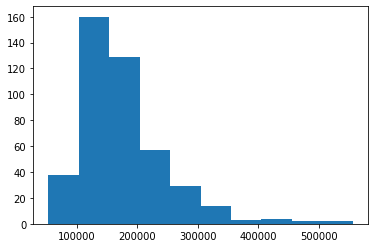

In [48]:
# Plotting y_test we can see it's a left skewed plot. 
plt.hist(y_test)

(array([  3.,  10.,  33.,  95., 101., 103.,  56.,  24.,   8.,   5.]),
 array([10.86856845, 11.1046684 , 11.34076836, 11.57686831, 11.81296827,
        12.04906822, 12.28516817, 12.52126813, 12.75736808, 12.99346804,
        13.22956799]),
 <a list of 10 Patch objects>)

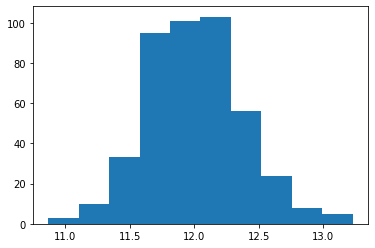

In [49]:
# let's do a transformation and see what plot it comes up with
plt.hist(np.log(y_test))

In [50]:
# As seen above after the transformation we get a normally distributed data set. 
# Let's use the transformed data and see if the model performs any better

lr = LinearRegression()
lr.fit(x_train,np.log(y_train))
result = lr.predict(x_test)

error = abs(y_test - pow(math.e,result)).sum()
mae = error / x_test.shape[0]

error,mae

# earlier the result was 20390 and now the result is 19846.842785222623 which means the model has 
# improved

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(8692917.139927508, 19846.842785222623)

### Intercept

In [ ]:
# So far we've seen Coefficients & Errors, let's see and understand what is intercept.

# If you notice, when x = 0 , y has already a value of 5. i.e. the value of an independent variable 
# when there is no impact of the dependent variable is intercept. 

# in y=mx+c , c is the intercept

<img src = 'img/lin-reg-intercept.svg' />

In [ ]:
# In the diagram above, the red line represents the predicted value after a linear regression algorithm 
# is executed. 

# the distance between each blue dot to the red line is the loss .. the sum of all such loss is the cost 
# function

# Let's use M(y) to indicate the sample mean of Y.
# Yi is the actual score for Y for each subject (subject number = i).
# Yi’ is the predicted value of X based on the regression equation with X as predictor. This is a point on 
# the regression line 


<img src='img/linreg-explain-error-1.jpg'/>

In [ ]:
# The component labeled in red in the equation and the graph is the total deviation of Y from the mean.
# This is broken down into two components: the residual or unexplained component (Y - Y’), the distance 
# of observed Y from the regression line, shown in blue.
# The explained component — the distance between the regression prediction line and My (shown in yellow).

# Note that as the slope of the regression line become less steep, the yellow component of the scores 
# (the explained component) becomes smaller.

# As the linear relation between Y and X becomes weaker, the unexplained (blue) components of scores 
# become larger.

# We would like the explained components (yellow) to be large relative to the 
# unexplained or residual components (blue).

# To summarize the information about these score components across all cases, we square each 
# deviation and then sum the deviations across all data values:

<img src='img/linreg-explain-error-2.jpg'/>

In [ ]:
# The proportion of explained variance (as a fraction of total variance), 
# known as R squared, is a ratio of SSexplained/ SStotal:

<img src='img/linreg-explain-error-3.jpg' />
<img src='img/linreg-explain-error-4.jpg' />

### Steps to improve the model

In [ ]:
# Check distribution of each variable and try to convert them as normal distributed data (Transformations)
# Don`t build the model on all columns select important columns and build the model ( Variance )
# Play around with different test/train split Linear Regression (80-20,70-30,60-40,90-10)
# Ensemble models(Increase the accuracy of the models)


### Video Recording for today's class

In [ ]:
# https://drive.google.com/drive/folders/1Ur-GFmT2vp17mtG8fo3Qrpd7WqFG7AAE?usp=sharing
